# BoardBot Consistency Test Analysis for LLM Router Architecture

## Introduction

This notebook analyzes the test results of the **BoardBot AI system** for the **Consistency Test Dataset**, focusing on the **LLM Router** architecture.

**Goals:**

1. **Understand characteristics and patterns in cases where consistency is low.**
2. **Analyze how different aspects like extracted filters, number of filters, token usage, response time, etc., correlate with consistency.**
3. **Identify potential areas for improvement based on the analysis.**

By performing a detailed analysis of individual test cases and their characteristics, we aim to gain insights into the system's performance and identify opportunities for enhancement.

---

## Table of Contents

1. [Data Loading and Preprocessing](#1)
    - Import Libraries
    - Load Data
    - Parse Metadata and Extract Features
    - Preprocess Data
2. [Data Exploration](#2)
    - Distribution of Consistency Metrics
    - Identify Low Consistency Cases
3. [Analysis of Low Consistency Cases](#3)
    - Compare Distributions Between Low and High Consistency Cases
    - Correlation Analysis
4. [Analyzing the Impact of Filter Differences on Consistency](#4)
    - Compute Filter Differences
    - Analyze Correlation Between Filter Differences and Consistency
    - Visualize Filter Differences for Individual Cases
5. [Detailed Analysis of Low Consistency Cases](#5)
    - Display Low Consistency Cases
    - Analyze Patterns in Low Consistency Cases
6. [Potential Areas for Improvement](#6)
7. [Conclusion](#7)
8. [Appendix: Additional Analysis](#8)

---

<a id="1"></a>

## 1. Data Loading and Preprocessing

### Import Libraries

In [36]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import pearsonr

# Set plotting style
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = [12, 6]

### Load Data

In [38]:
def load_data(file_path):
    df = pd.read_csv(file_path)
    print(f"Loaded {len(df)} test records.")
    return df

# Load the data
# Replace 'consistency_test_result.csv' with your actual data file path
df = load_data("../data/test_results/consistency_test_result.csv")

Loaded 137 test records.


**Sample Data Preview:**

In [39]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Message ID             137 non-null    object 
 1   Test Type              137 non-null    object 
 2   Model                  137 non-null    object 
 3   Architecture           137 non-null    object 
 4   Timestamp              137 non-null    object 
 5   Product Accuracy       137 non-null    object 
 6   Product Consistency    137 non-null    object 
 7   Order Consistency      137 non-null    object 
 8   Session ID             137 non-null    object 
 9   Input                  137 non-null    object 
 10  History Management     137 non-null    object 
 11  Response Type          137 non-null    object 
 12  Response               137 non-null    object 
 13  Products               137 non-null    object 
 14  Reasoning              137 non-null    object 
 15  Follow

,Message ID,Test Type,Model,Architecture,Timestamp,Product Accuracy,Product Consistency,Order Consistency,Session ID,Input,History Management,Response Type,Response,Products,Reasoning,Follow-up Question,Metadata,Tags,Product Consistency.1,Order Consistency.1
0,ff83d54a-1204-4e45-822e-76d14b754b4d_4_response,consistency,gpt-4o,llm-router,"11/4/2024, 5:09:03 AM",-,100.00%,100.00%,85432f37-bbe1-4c4e-96f3-81fe0e27b6a3,List Single Board Computers with a processor f...,keep-last-5,clear_intent_product,It seems like we're on the hunt for Broadcom-m...,"[{""productId"":""102110260"",""name"":""CORAL DEV"",""...",The search results did not yield any Broadcom-...,Are there any other specific features or manuf...,"{""classificationResult"":{""category"":""clear_int...",NaN,100.00%,100.00%
1,ff83d54a-1204-4e45-822e-76d14b754b4d_4_respons...,consistency,gpt-4o,llm-router,"11/4/2024, 5:09:03 AM",-,100.00%,100.00%,85432f37-bbe1-4c4e-96f3-81fe0e27b6a3,List Single Board Computers with a processor f...,keep-last-5,clear_intent_product,It looks like we're on the hunt for Broadcom S...,"[{""productId"":""102110260"",""name"":""CORAL DEV"",""...",The search results did not include any SBCs ma...,Are there specific applications or features yo...,"{""classificationResult"":{""category"":""clear_int...",NaN,100.00%,100.00%
2,ff83d54a-1204-4e45-822e-76d14b754b4d_4_respons...,consistency,gpt-4o,llm-router,"11/4/2024, 5:09:03 AM",-,100.00%,100.00%,85432f37-bbe1-4c4e-96f3-81fe0e27b6a3,List Single Board Computers with a processor f...,keep-last-5,clear_intent_product,It looks like we're on the hunt for a Broadcom...,"[{""productId"":""102110260"",""name"":""CORAL DEV"",""...",The search results did not include any Broadco...,Are there specific features or applications yo...,"{""classificationResult"":{""category"":""clear_int...",NaN,100.00%,100.00%
3,ff83d54a-1204-4e45-822e-76d14b754b4d_4_respons...,consistency,gpt-4o,llm-router,"11/4/2024, 5:09:03 AM",-,100.00%,100.00%,85432f37-bbe1-4c4e-96f3-81fe0e27b6a3,List Single Board Computers with a processor f...,keep-last-5,clear_intent_product,It looks like we're on the hunt for Broadcom s...,"[{""productId"":""102110260"",""name"":""CORAL DEV"",""...",The search results did not include any Broadco...,Are you open to considering SBCs from other ma...,"{""classificationResult"":{""category"":""clear_int...",NaN,100.00%,100.00%
4,ff83d54a-1204-4e45-822e-76d14b754b4d_4_respons...,consistency,gpt-4o,llm-router,"11/4/2024, 5:09:03 AM",-,100.00%,100.00%,85432f37-bbe1-4c4e-96f3-81fe0e27b6a3,List Single Board Computers with a processor f...,keep-last-5,clear_intent_product,It seems like we're on the hunt for a single-b...,"[{""productId"":""102110260"",""name"":""CORAL DEV"",""...",The search results did not return any SBCs wit...,Are you interested in exploring SBCs from othe...,"{""classificationResult"":{""category"":""clear_int...",NaN,100.00%,100.00%


### Parse Metadata and Extract Features

Define functions to parse metadata and extract relevant features.

In [40]:
def parse_metadata(metadata_str):
    try:
        return json.loads(metadata_str)
    except json.JSONDecodeError as e:
        print(f"JSONDecodeError: {e}")
        return {}
    except Exception as e:
        print(f"Error parsing metadata: {e}")
        return {}

def extract_token_usage(row):
    metadata = parse_metadata(row['Metadata'])
    input_tokens = metadata.get('inputTokenUsage', {})
    output_tokens = metadata.get('outputTokenUsage', {})
    return pd.Series({
        'input_tokens_total': sum(input_tokens.values()),
        'output_tokens_total': sum(output_tokens.values()),
        'input_tokens_classification': input_tokens.get('classification', 0),
        'input_tokens_queryProcessing': input_tokens.get('queryProcessing', 0),
        'input_tokens_generate': input_tokens.get('generate', 0),
        'output_tokens_classification': output_tokens.get('classification', 0),
        'output_tokens_queryProcessing': output_tokens.get('queryProcessing', 0),
        'output_tokens_generate': output_tokens.get('generate', 0),
    })

def extract_time_metrics(row):
    metadata = parse_metadata(row['Metadata'])
    time_taken = metadata.get('timeTaken', {})
    total_time = sum(time_taken.values())
    return pd.Series({
        'time_classification': time_taken.get('classification', 0),
        'time_queryProcessing': time_taken.get('queryProcessing', 0),
        'time_search': time_taken.get('search', 0),
        'time_generate': time_taken.get('generate', 0),
        'total_time': total_time
    })

def extract_filters(row):
    metadata = parse_metadata(row['Metadata'])
    filters = metadata.get('filters', {})
    num_filters = len(filters)
    return pd.Series({
        'filters': filters,
        'num_filters': num_filters
    })

def extract_classification_confidence(row):
    metadata = parse_metadata(row['Metadata'])
    classification_result = metadata.get('classificationResult', {})
    confidence = classification_result.get('confidence', None)
    return confidence

def extract_category(row):
    metadata = parse_metadata(row['Metadata'])
    classification_result = metadata.get('classificationResult', {})
    category = classification_result.get('category', None)
    return category

### Preprocess Data

Apply the extraction functions to the dataframe.

In [41]:
def preprocess_data(df):
    # Convert timestamp
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

    # Extract token usage
    token_metrics = df.apply(extract_token_usage, axis=1)
    df = pd.concat([df, token_metrics], axis=1)

    # Extract time metrics
    time_metrics = df.apply(extract_time_metrics, axis=1)
    df = pd.concat([df, time_metrics], axis=1)

    # Extract filters
    filter_metrics = df.apply(extract_filters, axis=1)
    df = pd.concat([df, filter_metrics], axis=1)

    # Extract classification confidence and category
    df['classification_confidence'] = df.apply(extract_classification_confidence, axis=1)
    df['category'] = df.apply(extract_category, axis=1)

    # Convert consistency metrics to numeric
    df['Product_Consistency'] = df['Product Consistency'].str.rstrip('%').astype(float)
    df['Order_Consistency'] = df['Order Consistency'].str.rstrip('%').astype(float)

    return df

# Preprocess the data
df = preprocess_data(df)

**Preview Preprocessed Data:**

In [42]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Message ID                     137 non-null    object        
 1   Test Type                      137 non-null    object        
 2   Model                          137 non-null    object        
 3   Architecture                   137 non-null    object        
 4   Timestamp                      137 non-null    datetime64[ns]
 5   Product Accuracy               137 non-null    object        
 6   Product Consistency            137 non-null    object        
 7   Order Consistency              137 non-null    object        
 8   Session ID                     137 non-null    object        
 9   Input                          137 non-null    object        
 10  History Management             137 non-null    object        
 11  Response Type      

,Message ID,Test Type,Model,Architecture,Timestamp,Product Accuracy,Product Consistency,Order Consistency,Session ID,Input,...,time_queryProcessing,time_search,time_generate,total_time,filters,num_filters,classification_confidence,category,Product_Consistency,Order_Consistency
0,ff83d54a-1204-4e45-822e-76d14b754b4d_4_response,consistency,gpt-4o,llm-router,2024-11-04 05:09:03,-,100.00%,100.00%,85432f37-bbe1-4c4e-96f3-81fe0e27b6a3,List Single Board Computers with a processor f...,...,1.490509,2.310909,6.988001,12.840842,"{'manufacturer': 'BROADCOM', 'formFactor': 'SBC'}",2,95,clear_intent_product,100.0,100.0
1,ff83d54a-1204-4e45-822e-76d14b754b4d_4_respons...,consistency,gpt-4o,llm-router,2024-11-04 05:09:03,-,100.00%,100.00%,85432f37-bbe1-4c4e-96f3-81fe0e27b6a3,List Single Board Computers with a processor f...,...,1.508994,2.507217,6.789648,12.843055,"{'manufacturer': 'BROADCOM', 'formFactor': 'SBC'}",2,95,clear_intent_product,100.0,100.0
2,ff83d54a-1204-4e45-822e-76d14b754b4d_4_respons...,consistency,gpt-4o,llm-router,2024-11-04 05:09:03,-,100.00%,100.00%,85432f37-bbe1-4c4e-96f3-81fe0e27b6a3,List Single Board Computers with a processor f...,...,1.549703,2.394333,7.758476,13.812825,"{'manufacturer': 'BROADCOM', 'formFactor': 'SBC'}",2,95,clear_intent_product,100.0,100.0
3,ff83d54a-1204-4e45-822e-76d14b754b4d_4_respons...,consistency,gpt-4o,llm-router,2024-11-04 05:09:03,-,100.00%,100.00%,85432f37-bbe1-4c4e-96f3-81fe0e27b6a3,List Single Board Computers with a processor f...,...,1.316222,2.663851,7.786842,13.844414,"{'manufacturer': 'BROADCOM', 'formFactor': 'SBC'}",2,90,clear_intent_product,100.0,100.0
4,ff83d54a-1204-4e45-822e-76d14b754b4d_4_respons...,consistency,gpt-4o,llm-router,2024-11-04 05:09:03,-,100.00%,100.00%,85432f37-bbe1-4c4e-96f3-81fe0e27b6a3,List Single Board Computers with a processor f...,...,1.463653,1.904314,9.101517,14.905263,"{'manufacturer': 'BROADCOM', 'formFactor': 'SBC'}",2,95,clear_intent_product,100.0,100.0


---

<a id="2"></a>

## 2. Data Exploration

### Distribution of Consistency Metrics

#### Product Consistency

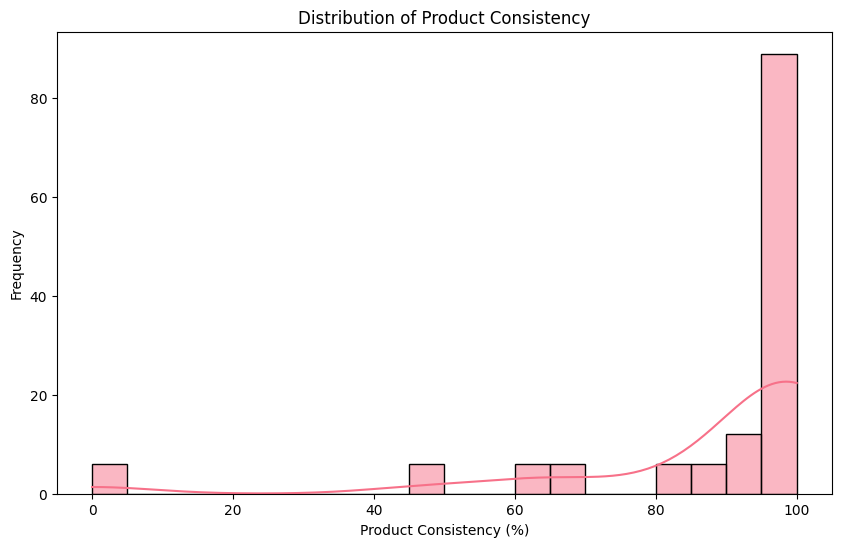

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(df['Product_Consistency'], bins=20, kde=True)
plt.title('Distribution of Product Consistency')
plt.xlabel('Product Consistency (%)')
plt.ylabel('Frequency')
plt.show()

#### Order Consistency

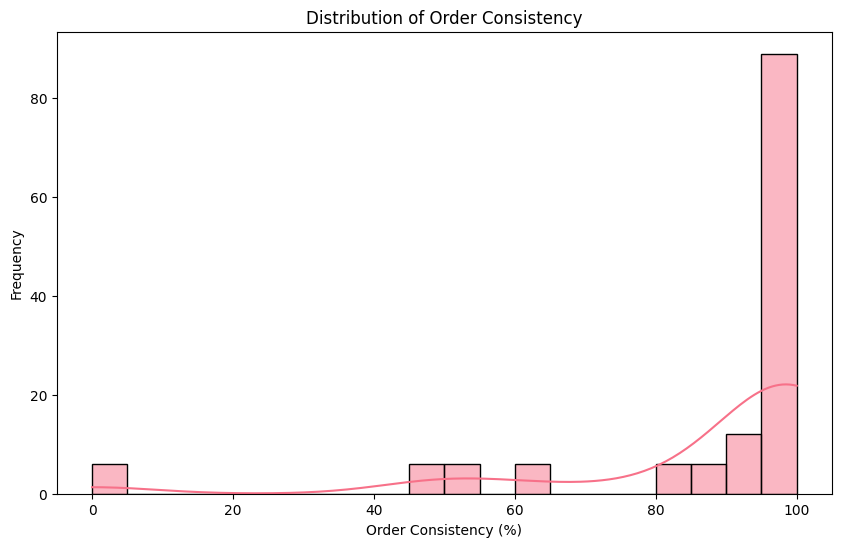

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(df['Order_Consistency'], bins=20, kde=True)
plt.title('Distribution of Order Consistency')
plt.xlabel('Order Consistency (%)')
plt.ylabel('Frequency')
plt.show()

### Identify Low Consistency Cases

Define a threshold to categorize low consistency cases.

In [45]:
consistency_threshold = 80.0  # Define threshold for low consistency
df['Consistency_Level'] = np.where(df['Product_Consistency'] < consistency_threshold, 'Low Consistency', 'High Consistency')

# Counts
num_low_consistency = df[df['Consistency_Level'] == 'Low Consistency'].shape[0]
total_cases = df.shape[0]
print(f"Number of low consistency cases (< {consistency_threshold}%): {num_low_consistency}")
print(f"Total number of cases: {total_cases}")

Number of low consistency cases (< 80.0%): 24
Total number of cases: 137


---

<a id="3"></a>

## 3. Analysis of Low Consistency Cases

### Compare Distributions Between Low and High Consistency Cases

#### Number of Filters

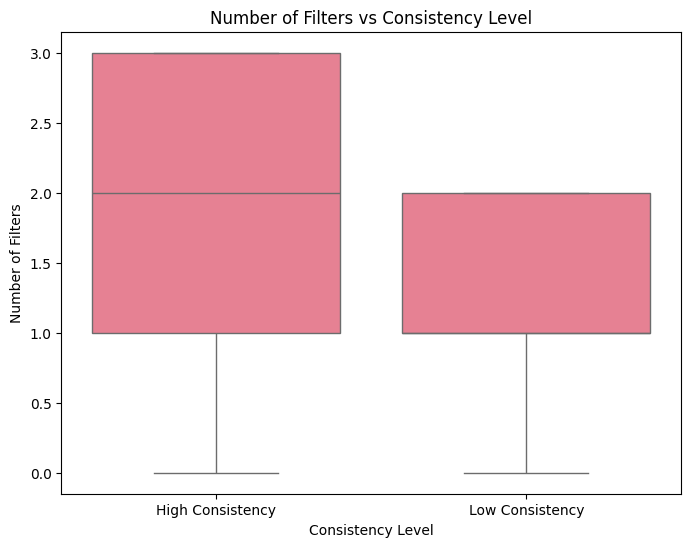

In [46]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Consistency_Level', y='num_filters', data=df)
plt.title('Number of Filters vs Consistency Level')
plt.xlabel('Consistency Level')
plt.ylabel('Number of Filters')
plt.show()

#### Classification Confidence

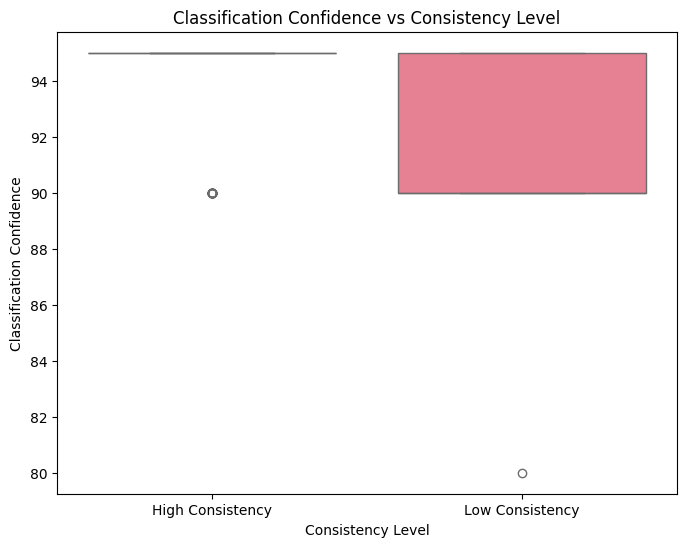

In [47]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Consistency_Level', y='classification_confidence', data=df)
plt.title('Classification Confidence vs Consistency Level')
plt.xlabel('Consistency Level')
plt.ylabel('Classification Confidence')
plt.show()

#### Token Usage

Input Tokens:

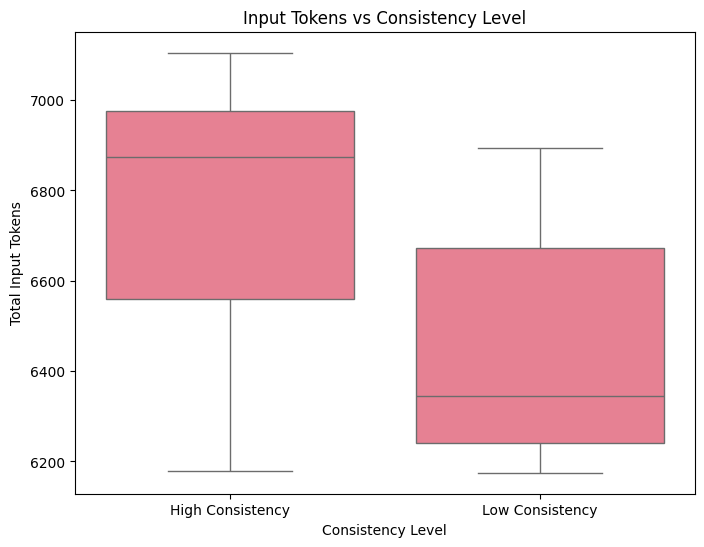

In [48]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Consistency_Level', y='input_tokens_total', data=df)
plt.title('Input Tokens vs Consistency Level')
plt.xlabel('Consistency Level')
plt.ylabel('Total Input Tokens')
plt.show()

Output Tokens:

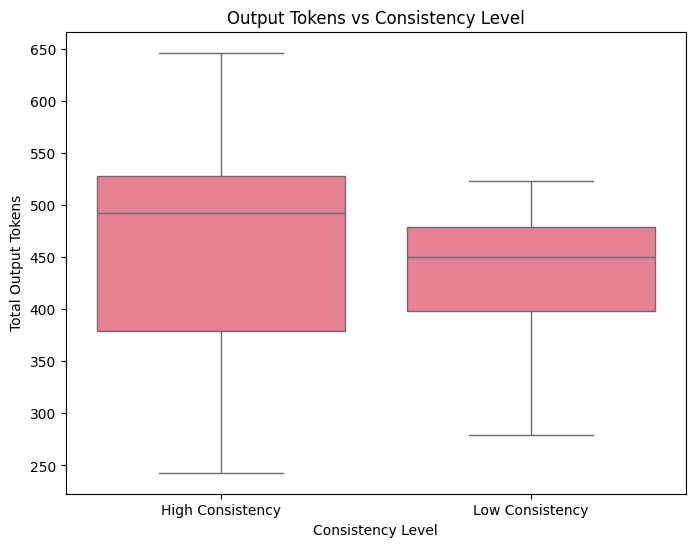

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Consistency_Level', y='output_tokens_total', data=df)
plt.title('Output Tokens vs Consistency Level')
plt.xlabel('Consistency Level')
plt.ylabel('Total Output Tokens')
plt.show()

#### Response Time

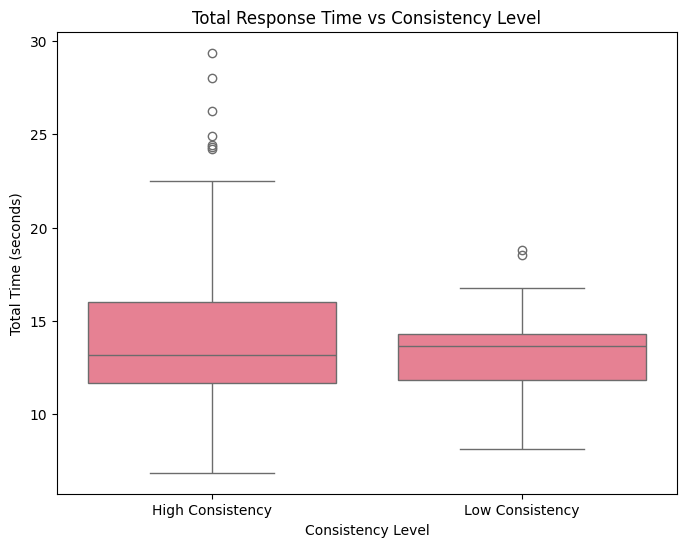

In [50]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Consistency_Level', y='total_time', data=df)
plt.title('Total Response Time vs Consistency Level')
plt.xlabel('Consistency Level')
plt.ylabel('Total Time (seconds)')
plt.show()

### Correlation Analysis

Compute correlations between product consistency and other variables.

In [51]:
variables_to_analyze = ['num_filters', 'input_tokens_total', 'output_tokens_total', 'total_time', 'classification_confidence']
correlations = df[['Product_Consistency'] + variables_to_analyze].corr()
print("Correlation with Product Consistency:")
print(correlations['Product_Consistency'][variables_to_analyze])

Correlation with Product Consistency:
num_filters                  0.233101
input_tokens_total           0.224813
output_tokens_total          0.083731
total_time                   0.106810
classification_confidence    0.148046
Name: Product_Consistency, dtype: float64


#### Visualizing Correlations

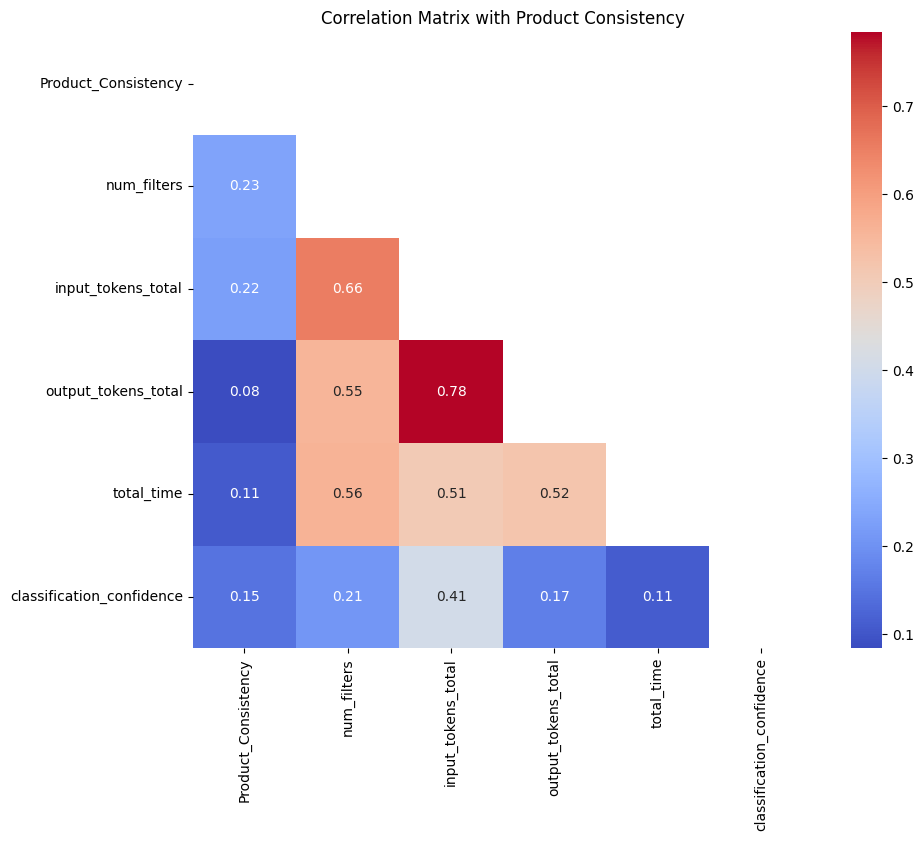

In [52]:
# Heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlations, dtype=bool))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title("Correlation Matrix with Product Consistency")
plt.show()

---

<a id="4"></a>

## 4. Analyzing the Impact of Filter Differences on Consistency

### Compute Filter Differences

First, organize the data to group original prompts and their variations.

In [53]:
# Create a 'Prompt_ID' that groups original prompts and their variations
df['Prompt_ID'] = df['Session ID'] + '_' + df['Input'].str[:50]  # Adjust as needed

# Identify original prompts and their variations
df['Is_Variation'] = df['Message ID'].str.contains('_variation_')

Compute filter differences.

In [55]:
def compute_filter_differences(group):
    main_filters = group[group["Is_Variation"] == False]["filters"].iloc[0]
    variation_filters = group[group["Is_Variation"] == True]["filters"]

    filter_diffs = []
    for filters in variation_filters:
        # Compare filters
        main_set = frozenset((k, str(v)) for k, v in main_filters.items())
        variation_set = frozenset((k, str(v)) for k, v in filters.items())
        # Compute symmetric difference
        diff = main_set.symmetric_difference(variation_set)
        diff_count = len(diff)
        filter_diffs.append(diff_count)

    return pd.Series(
        {
            "filter_diff_mean": np.mean(filter_diffs) if filter_diffs else 0,
            "filter_diff_max": np.max(filter_diffs) if filter_diffs else 0,
            "num_variations": len(variation_filters),
        }
    )


# Group by 'Prompt_ID'
grouped = df.groupby("Prompt_ID")

# Apply function to compute filter differences
filter_diff_metrics = grouped.apply(compute_filter_differences).reset_index()

# Merge back to df
df = df.merge(filter_diff_metrics, on="Prompt_ID", how="left")
df.head()

/var/folders/rp/6b0gnlkd7cl_wvl_lj9y8nx40000gn/T/ipykernel_69060/254218591.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filter_diff_metrics = grouped.apply(compute_filter_differences).reset_index()


,Message ID,Test Type,Model,Architecture,Timestamp,Product Accuracy,Product Consistency,Order Consistency,Session ID,Input,...,classification_confidence,category,Product_Consistency,Order_Consistency,Consistency_Level,Prompt_ID,Is_Variation,filter_diff_mean,filter_diff_max,num_variations
0,ff83d54a-1204-4e45-822e-76d14b754b4d_4_response,consistency,gpt-4o,llm-router,2024-11-04 05:09:03,-,100.00%,100.00%,85432f37-bbe1-4c4e-96f3-81fe0e27b6a3,List Single Board Computers with a processor f...,...,95,clear_intent_product,100.0,100.0,High Consistency,85432f37-bbe1-4c4e-96f3-81fe0e27b6a3_List Sing...,False,0.0,0.0,5.0
1,ff83d54a-1204-4e45-822e-76d14b754b4d_4_respons...,consistency,gpt-4o,llm-router,2024-11-04 05:09:03,-,100.00%,100.00%,85432f37-bbe1-4c4e-96f3-81fe0e27b6a3,List Single Board Computers with a processor f...,...,95,clear_intent_product,100.0,100.0,High Consistency,85432f37-bbe1-4c4e-96f3-81fe0e27b6a3_List Sing...,True,0.0,0.0,5.0
2,ff83d54a-1204-4e45-822e-76d14b754b4d_4_respons...,consistency,gpt-4o,llm-router,2024-11-04 05:09:03,-,100.00%,100.00%,85432f37-bbe1-4c4e-96f3-81fe0e27b6a3,List Single Board Computers with a processor f...,...,95,clear_intent_product,100.0,100.0,High Consistency,85432f37-bbe1-4c4e-96f3-81fe0e27b6a3_List Sing...,True,0.0,0.0,5.0
3,ff83d54a-1204-4e45-822e-76d14b754b4d_4_respons...,consistency,gpt-4o,llm-router,2024-11-04 05:09:03,-,100.00%,100.00%,85432f37-bbe1-4c4e-96f3-81fe0e27b6a3,List Single Board Computers with a processor f...,...,90,clear_intent_product,100.0,100.0,High Consistency,85432f37-bbe1-4c4e-96f3-81fe0e27b6a3_List Sing...,True,0.0,0.0,5.0
4,ff83d54a-1204-4e45-822e-76d14b754b4d_4_respons...,consistency,gpt-4o,llm-router,2024-11-04 05:09:03,-,100.00%,100.00%,85432f37-bbe1-4c4e-96f3-81fe0e27b6a3,List Single Board Computers with a processor f...,...,95,clear_intent_product,100.0,100.0,High Consistency,85432f37-bbe1-4c4e-96f3-81fe0e27b6a3_List Sing...,True,0.0,0.0,5.0


### Analyze Correlation Between Filter Differences and Consistency

#### Scatter Plot of Filter Differences vs Product Consistency

In [57]:
def plot_scatter(df, x_col, y_col, variations_only=True, title=None, x_label=None, y_label=None):
    # Filter data if needed
    plot_df = df[df["Is_Variation"] == True] if variations_only else df

    # Count occurrences of each x,y coordinate
    coord_counts = plot_df.groupby([x_col, y_col]).size().reset_index(name="count")

    # Create figure and plot
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        x=coord_counts[x_col],
        y=coord_counts[y_col],
        s=coord_counts["count"] * 100,  # Scale point size by count
        alpha=0.6,
        color="#2ecc71",
    )

    # Add count annotations on points
    for idx, row in coord_counts.iterrows():
        plt.annotate(
            str(int(row["count"])),
            (row[x_col], row[y_col]),
            xytext=(5, 5),
            textcoords="offset points",
            fontsize=10,
            bbox=dict(facecolor="white", alpha=0.8, edgecolor="none"),
        )

    # Add total count annotation
    n_points = len(plot_df)
    plt.text(
        0.95,
        0.05,
        f"n = {n_points}",
        transform=plt.gca().transAxes,
        fontsize=10,
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="none"),
    )

    # Customize plot
    plt.title(title, pad=20, fontsize=14, fontweight="bold")
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # Add grid and customize appearance
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

    plt.tight_layout()
    plt.show()

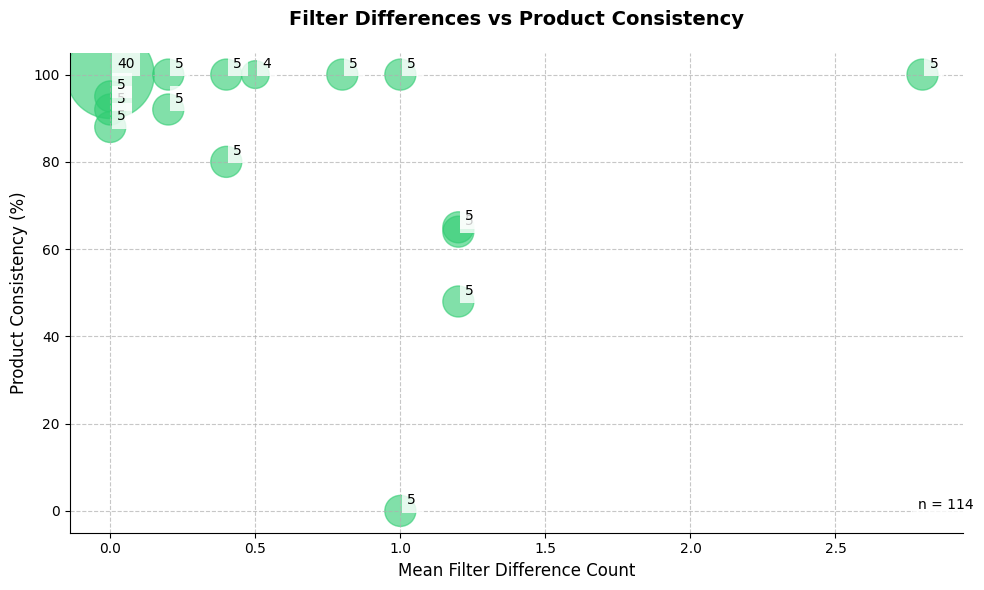

In [59]:
# Only consider variations
df_variations = df[df['Is_Variation'] == True]


plot_scatter(df_variations, 'filter_diff_mean', 'Product_Consistency', title='Filter Differences vs Product Consistency', x_label='Mean Filter Difference Count', y_label='Product Consistency (%)')

#### Correlation Analysis

In [60]:
corr_coef, p_value = pearsonr(df_variations['filter_diff_mean'], df_variations['Product_Consistency'])
print(f"Correlation between Filter Differences and Product Consistency: {corr_coef:.2f} (p-value: {p_value:.2e})")

Correlation between Filter Differences and Product Consistency: -0.35 (p-value: 1.25e-04)


#### Histogram of Filter Differences for Low and High Consistency

/var/folders/rp/6b0gnlkd7cl_wvl_lj9y8nx40000gn/T/ipykernel_69060/1022120655.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variations['Consistency_Level'] = pd.cut(


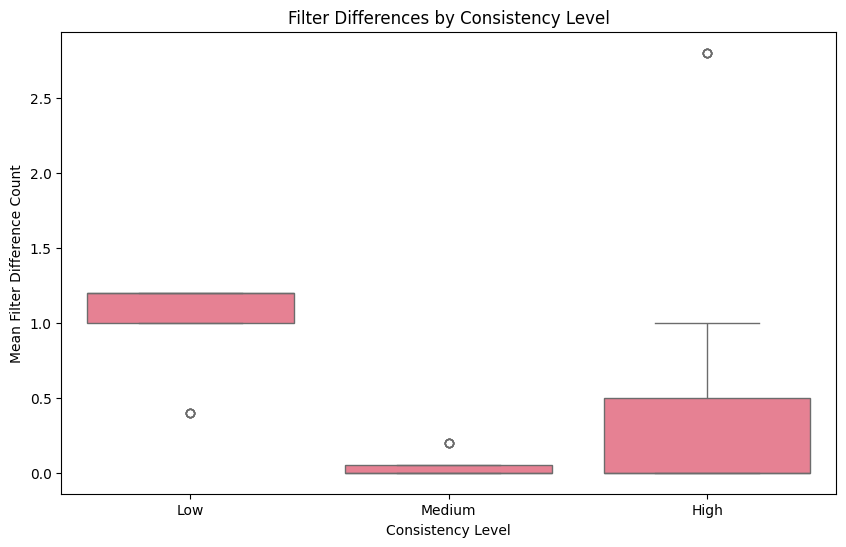

In [61]:
# Define low and high consistency thresholds
low_consistency_threshold = 80.0
high_consistency_threshold = 95.0

# Create categories
df_variations['Consistency_Level'] = pd.cut(
    df_variations['Product_Consistency'],
    bins=[0, low_consistency_threshold, high_consistency_threshold, 100],
    labels=['Low', 'Medium', 'High']
)

plt.figure(figsize=(10,6))
sns.boxplot(x='Consistency_Level', y='filter_diff_mean', data=df_variations)
plt.title('Filter Differences by Consistency Level')
plt.xlabel('Consistency Level')
plt.ylabel('Mean Filter Difference Count')
plt.show()

### Visualize Filter Differences for Individual Cases

Display cases where filter differences are significant.

In [77]:
def display_cases_with_filter_differences(df_variations, num_cases=5):
    significant_cases = df_variations[df_variations['filter_diff_mean'] > 0].sort_values('Product_Consistency').head(num_cases)

    # Group cases by Product Consistency
    grouped_cases = significant_cases.groupby('Product_Consistency')

    for consistency, group in grouped_cases:
        print(f"\n{'='*100}\n")
        print(f"Product Consistency: {consistency}%")
        print(f"Number of Cases: {len(group)}\n")

        print(f"╔{'═'*124}╗")
        print(f"║ {'Case Details':^122} ║")
        print(f"╠{'═'*124}╣")

        for idx, row in group.iterrows():
            print(f"║ Case Index: {idx:<110} ║")
            print(f"║ Filter Difference Count: {row['filter_diff_mean']:<97} ║")
            main_filters = df[(df['Prompt_ID'] == row['Prompt_ID']) & (df['Is_Variation'] == False)]['filters'].iloc[0]
            print(f"║ Main Prompt Filters: {str(main_filters):<101} ║")
            print(f"║ Variation Filters: {str(row['filters']):<103} ║")
            print(f"║ Input Query: {str(row['Input']):<109} ║")
            print(f"╟{'─'*124}╢")

        print(f"╚{'═'*124}╝")

# Display cases
display_cases_with_filter_differences(df_variations, num_cases=25)



Product Consistency: 0.0%
Number of Cases: 5

╔════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║                                                        Case Details                                                        ║
╠════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╣
║ Case Index: 131                                                                                                            ║
║ Filter Difference Count: 1.0                                                                                               ║
║ Main Prompt Filters: {}                                                                                                    ║
║ Variation Filters: {'processorManufacturer': 'INTEL'}                                                                      ║
║ Input Query: What are the available hardware platforms with I

---

<a id="5"></a>

## 5. Detailed Analysis of Low Consistency Cases

### Display Low Consistency Cases

Provide a more detailed analysis of low consistency cases.

In [63]:
def display_low_consistency_cases(df_low_consistency, num_cases=5):
    for idx, row in df_low_consistency.head(num_cases).iterrows():
        print(f"Case Index: {idx}")
        print(f"Product Consistency: {row['Product_Consistency']}%")
        print(f"Order Consistency: {row['Order_Consistency']}%")
        print(f"Input Query: {row['Input']}")
        print(f"Is Variation: {row['Is_Variation']}")
        print(f"Extracted Filters: {row['filters']}")
        print(f"Number of Filters: {row['num_filters']}")
        print(f"Classification Confidence: {row['classification_confidence']}")
        print(f"Category: {row['category']}")
        print(f"Response: {row['Response']}")
        print(f"Reasoning: {row['Reasoning']}")
        print("-"*80)

# Display the low consistency cases
df_low_consistency = df[df['Consistency_Level'] == 'Low Consistency'].sort_values('Product_Consistency')
display_low_consistency_cases(df_low_consistency, num_cases=10)

Case Index: 131
Product Consistency: 0.0%
Order Consistency: 0.0%
Input Query: What are the available hardware platforms with Intel Turbo Boost Technology and Hyper-Threading Technology?
Is Variation: True
Extracted Filters: {'processorManufacturer': 'INTEL'}
Number of Filters: 1
Classification Confidence: 95
Category: clear_intent_product
Response: It looks like you're interested in hardware platforms that feature Intel Turbo Boost Technology and Hyper-Threading Technology. While the search results don't specifically mention these technologies, I can highlight some Intel-based products that might align with your needs. The CPCI HLM by ADLINK Technology Inc is a high-performance CompactPCI processor blade equipped with Intel's 8th Gen Xeon and Core processors, which are known for supporting advanced features like Turbo Boost and Hyper-Threading. This makes it a strong candidate for robust industrial applications. Another option is the SOMD module, featuring Intel Xeon D processors, whi

### Analyze Patterns in Low Consistency Cases

Upon examining the low consistency cases, consider the following:

- **Filter Extraction Issues:** Are the extracted filters inconsistent between the original prompt and its variations?
- **Classification Confidence:** Is there a significant drop in confidence for variations?
- **Response Variation:** Do the responses differ significantly in content or structure?
- **Token Usage and Response Time:** Are there notable differences compared to high consistency cases?
- **Query Complexity:** Do the variations introduce ambiguities or complexities affecting the model's performance?

---

<a id="6"></a>

## 6. Potential Areas for Improvement

Based on the analysis:

- Improve the algorithm to handle query variations and extract accurate filters.
- Implement robust parsing to handle typos and rephrased queries.
- Optimize LLM token usage for better accuracy and efficiency.
- Enhance product feature extraction pipeline to improve filter quality.


---

<a id="7"></a>

## 7. Conclusion

**Findings:**

- There is a noticeable correlation between filter differences and product consistency.